# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

The background for choosing this topic is to get information on movie data released in 2021. The information needed includes movie titles, rating values, meta score, and votes. This scraping method is quite interesting to get various kinds of information from a website for free.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. Because the key in doing scraping, we must know the right key from the inspect element results from the IMDB website. in this case I use the 'lister list detail sub-list' as the key to `.find()` and store in the variable table

to make it easier to read the find results we use the `.prettify()` function and display the first 2000 lines

In [4]:
table = soup.find('div',attrs={'class':'lister list detail sub-list'})
print(table.prettify()[1:2000])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt8179402/">
     <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
    </a>
   </div>
   <div class="lister-item-content">
    <h3 class="lister-item-header">
     <span class="lister-item-index unbold text-primary">
      1.
     </span>
     <a href="/title/tt8179402/">
      Fate: The Winx Saga
     </a>
     <span class="lister-item-year text-muted unbold">
      (2021– )
     </span>
    </h3>
    <p class="tex

Finding row length.

In [5]:
find_row = table.findAll('div',attrs={'class':'lister-item mode-advanced'})
row_length = len(find_row)
print(row_length)

50


to get the title of the movie, use `.find_all()` in the lister-item-header tag and then find on the tag and store it in the title variable

for imdb ratings, use `.find_all()` in the inline-block ratings-imdb-rating tag and then find on the strong tag and store it as a rating variable

for metascore, several steps are taken to get the value. first look for the value using `.find_all()` in the ratings-bar tag stored in the imdb_metascore variable then from the imdb_metascore results, search again using `.find()` for the inline-block ratings-metascore tag and stored in the film_metascore variable.
then create a metascore variable with a default value of 0 (because not all movies have a metascore value)
the next step is to do an if condition on the film_metascore variable if it is not empty it will be filled in from the search results on the metascore tag and the updated metascore value

for votes, use the search step in the sort-num_votes-visible tag and store it as a variable value. then the results of the search on the variable value are reused to get the votes value in the nv tag

The results of scraping each variable were added in the form of values in the form of an array in accordance with the order and store in the variable temp

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get the title
    title = table.find_all('h3',attrs= {'class': 'lister-item-header'})[i]
    title = title.find('a').text
    
    #get the rating IMDB
    rating = table.find_all('div',attrs= {'class': 'inline-block ratings-imdb-rating'})[i]
    rating = rating.find('strong').text
    
    #get the metascore
    imdb_metascore = table.find_all('div',attrs= {'class': 'ratings-bar'})
    film_metascore = imdb_metascore[i].find('div',attrs= {'class': 'inline-block ratings-metascore'})
    metascore = 0
                                            
    if film_metascore is not None:
        
        metascore =film_metascore.find('span', attrs ={'class' : 'metascore'}).text.strip()
    
    #get the votes
    value = table.find_all('p', attrs = {'class':'sort-num_votes-visible'})[i]
    votes = value.find('span', attrs = {'name': 'nv'}).text

    temp.append((title,rating,metascore,votes))
    
temp 

[('Fate: The Winx Saga', '6.9', 0, '44,511'),
 ('The White Lotus', '7.6', 0, '67,711'),
 ('Only Murders in the Building', '8.1', 0, '96,354'),
 ('Abbott Elementary', '8.2', 0, '13,724'),
 ('The Black Phone', '7.0', '65', '113,049'),
 ('Resident Alien', '8.1', 0, '39,224'),
 ('American Horror Stories', '6.2', 0, '20,777'),
 ('1883', '8.8', 0, '63,196'),
 ('Reservation Dogs', '8.1', 0, '14,619'),
 ('Spider-Man: No Way Home', '8.3', '71', '730,413'),
 ('La scuola cattolica', '5.7', 0, '1,798'),
 ('Dune: Part One', '8.0', '74', '614,413'),
 ('Licorice Pizza', '7.2', '90', '105,554'),
 ('Forsvinningen på Lørenskog', '6.1', 0, '1,065'),
 ('Dopesick', '8.6', 0, '54,544'),
 ("NCIS: Hawai'i", '6.3', 0, '5,532'),
 ('Mona Lisa and the Blood Moon', '6.2', '69', '1,011'),
 ('The Little Things', '6.3', '54', '99,621'),
 ('Bloodlands', '6.6', 0, '5,078'),
 ('Arcane: League of Legends', '9.0', 0, '197,841'),
 ('Yellowjackets', '7.9', 0, '44,875'),
 ('The Wheel of Time', '7.1', 0, '102,414'),
 ('Sing 2

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

imdb = pd.DataFrame(temp, columns = ('Film_Title','IMDB_Rating','Metascore','Votes'))
imdb.head()

,Film_Title,IMDB_Rating,Metascore,Votes
0,Fate: The Winx Saga,6.9,0,"44,511"
1,The White Lotus,7.6,0,"67,711"
2,Only Murders in the Building,8.1,0,"96,354"
3,Abbott Elementary,8.2,0,"13,724"
4,The Black Phone,7.0,65,"113,049"


Some data cleansing has been done when scraping by filling in an empty value in the metascore key with a value of 0, then changing the data type in the column that is still an object value. in the votes column there is a comma, in that column it will remove the comma

In [8]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film_Title   50 non-null     object
 1   IMDB_Rating  50 non-null     object
 2   Metascore    50 non-null     object
 3   Votes        50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [9]:
imdb['Votes'] = imdb['Votes'].str.replace(",","")
imdb['Votes'] = imdb['Votes'].astype('int64')
imdb['IMDB_Rating'] = imdb['IMDB_Rating'].astype('float64')
imdb['Metascore'] = imdb['Metascore'].astype('int64')
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film_Title   50 non-null     object 
 1   IMDB_Rating  50 non-null     float64
 2   Metascore    50 non-null     int64  
 3   Votes        50 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [10]:
imdb.head()

,Film_Title,IMDB_Rating,Metascore,Votes
0,Fate: The Winx Saga,6.9,0,44511
1,The White Lotus,7.6,0,67711
2,Only Murders in the Building,8.1,0,96354
3,Abbott Elementary,8.2,0,13724
4,The Black Phone,7.0,65,113049


For the visualization data, I tried to used the movie title, the value of the normalized metascore and imdb_rating

In the section below normalize the IMDB_Rating column by multiplying it by 10 and saving it in a new column with the name n_IMDB_Rating. this is done so that the rating and metascore values can be compared on the same scale when visualized on the plot

In [12]:
imdb['n_IMDB_Rating'] = imdb['IMDB_Rating']*10
imdb.head()

,Film_Title,IMDB_Rating,Metascore,Votes,n_IMDB_Rating
0,Fate: The Winx Saga,6.9,0,44511,69.0
1,The White Lotus,7.6,0,67711,76.0
2,Only Murders in the Building,8.1,0,96354,81.0
3,Abbott Elementary,8.2,0,13724,82.0
4,The Black Phone,7.0,65,113049,70.0


In [13]:
imdb['n_IMDB_Rating'] = imdb['n_IMDB_Rating'].astype('int64')
imdb[((imdb['Metascore']!=0) & (imdb['n_IMDB_Rating']!=0))].sort_values('n_IMDB_Rating',ascending=False).head(7)

,Film_Title,IMDB_Rating,Metascore,Votes,n_IMDB_Rating
9,Spider-Man: No Way Home,8.3,71,730413,83
11,Dune: Part One,8.0,74,614413,80
35,Gekijouban Jujutsu Kaisen 0,7.9,71,14805,79
47,The Last Duel,7.4,67,152118,74
22,Sing 2,7.4,49,65797,74
23,No Time to Die,7.3,68,390273,73
12,Licorice Pizza,7.2,90,105554,72


at this stage I tried to subsetting the metascore and n_IMDB_Rating values along with the movie title. With the condition of the metascore value != 0, the data to be displayed is assumed to have complete data in each row. even though there are films that have a high rating rating but do not have a metascore value, it will not be included in the 7 good films

In [14]:
imdb_ratingXmeta = imdb[((imdb['Metascore']!=0) & (imdb['n_IMDB_Rating']!=0))].loc[:,['Film_Title','Metascore','n_IMDB_Rating']].sort_values('n_IMDB_Rating',ascending=False)

In [15]:
imdb_ratingXmeta

,Film_Title,Metascore,n_IMDB_Rating
9,Spider-Man: No Way Home,71,83
11,Dune: Part One,74,80
35,Gekijouban Jujutsu Kaisen 0,71,79
47,The Last Duel,67,74
22,Sing 2,49,74
23,No Time to Die,68,73
12,Licorice Pizza,90,72
42,Don't Look Up,49,72
28,Last Night in Soho,65,71
32,Ghostbusters: Afterlife,45,71


In [16]:
imdb_ratingXmetascore = imdb_ratingXmeta.sort_values('n_IMDB_Rating',ascending=False).set_index('Film_Title')

In [21]:
imdb_ratingXmetascore.head(7)

,Metascore,n_IMDB_Rating
Film_Title,,
Spider-Man: No Way Home,71,83
Dune: Part One,74,80
Gekijouban Jujutsu Kaisen 0,71,79
The Last Duel,67,74
Sing 2,49,74
No Time to Die,68,73
Licorice Pizza,90,72


In [18]:
imdb_ratingXmetascore['n_IMDB_Rating'].mean().round(2)

69.4

<AxesSubplot:xlabel='Film_Title'>

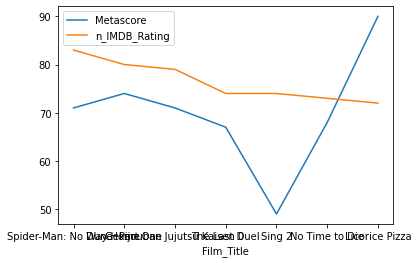

In [19]:
imdb_ratingXmetascore.head(7).plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'50 Films Release in 2021 by Rating X Metascore'}, ylabel='Frequency'>

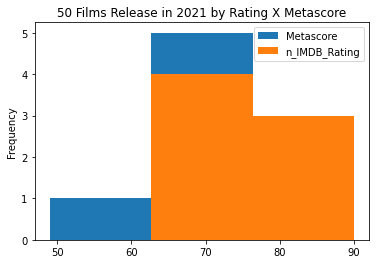

In [20]:
imdb_ratingXmetascore.head(7).plot.hist(title = '50 Films Release in 2021 by Rating X Metascore',bins=3)

We have just finished discussing the scraping film data released in 2021 from the url https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31 and the results of the scraping are collected data as much as 50 lines of information.

In doing scraping there are obstacles found such as incomplete information in a film, such as key metascore. therefore we have to set a default value of 0 for each movie that does not have a metascore value. after the scraping process is complete, then there is a process of saving the scraping data into the dataframe.

when we already have data in the form of a data frame, the next step we can do is perform data cleansing and data wrangling. for example, changing the data type which should be float or int, removing the coma on the value contained in the votes column, normalizing the IMDB_Rating column by multiplying by 10 and storing it in a new column called n_IMDB_Rating. This is done so that the scale of the metascore and rating is the same and can be compared. for the data wrangling process, the process of checking / retrieval of values ​​on the metascore and n_IMDB_Rating and must contain the value and then stored in a new dataframe named imdb_ratingXmetascore.

for visualization using a histogram plot to see how much frequency each metascore value and n_IMDB_Rating are and it can be seen that the range of values ​​from 65 to 75 is the value that appears the most from a film, it can be concluded that films with rating values ​​and metascores greater than 75 are not so much (possibly in 2021 a bit of a good movie).

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.